# Project: TMDb Movie Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

TMDb has collected data on over 10,000 movies featuring popularity, budgests and revenue, and features of the movies. This investigation will seek to answer these questions:
>1) What drives higher ratings?
<br>
>2) What drives profitability?
<br>
>3) Which year was the most movies released?
<br>
>4) Which genre is most popular?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [2]:
df = pd.read_csv('tmdb-movies.csv')
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08


In [3]:
df.shape

(10866, 21)

This dataframe consists of 21 columns and 10,866 rows.

In [4]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


Interesting to note the budget, revenue, runtime can appear to be 0 shown by the minimum. According the www.themoviedb.org, this indicates the data hasn't been entered yet.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

Many columns have Null values. imbd_id, cast, homepage, director, tagline, keywords, overview, genres and production_companies have Null values. There is 3 different datatypes used, 21 total columns and 10866 rows. Release date is currently an object instead of a date time.

In [6]:
df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [7]:
df.fillna(0)
print()

Count of all the Null values within the data set. Homepage, tagline, keywords, and production companies all have over 1,000 missing values. All Null values were replaced with 0.

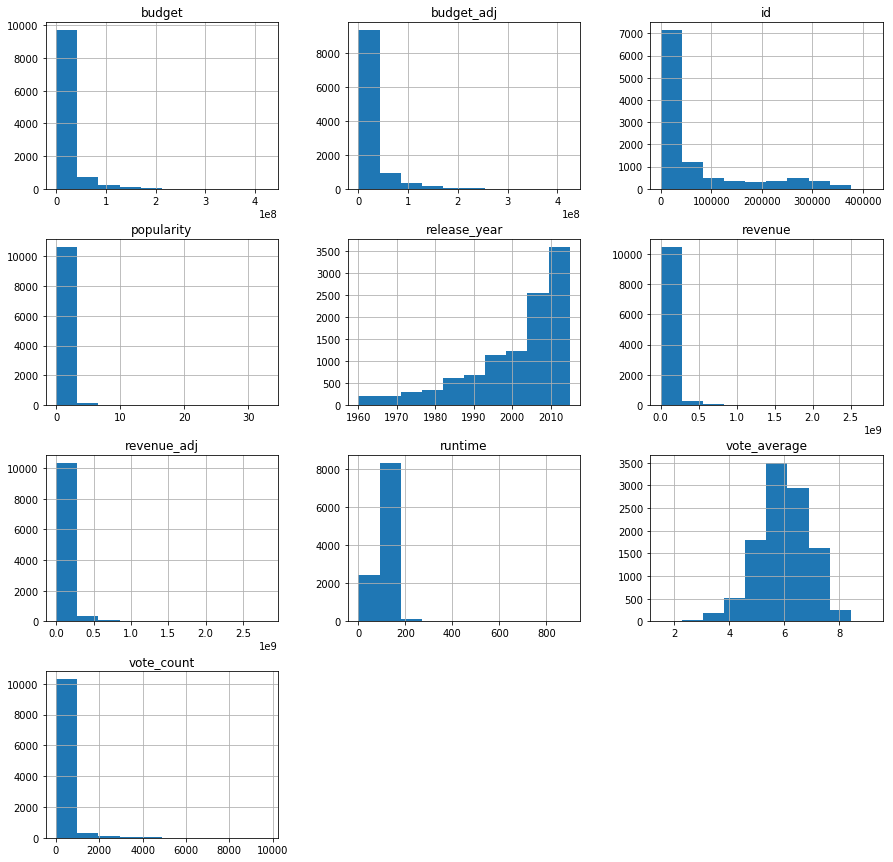

In [8]:
df.hist(figsize=(15,15));

Release year is the only column skewed to the left and vote_average is the only column that appears to be normally distributed. While all others are skewed the right and appear to have outliers far right.

### Data Cleaning (Replace this with more specific notes!)

Data needing to be modified:
>1) Drop columns that are not needed
<br>
>2) Chane format of release date into a datetime format
<br>
>3) Remove movies with zero budget, revenue or runtime
<br>
>4) Remove any duplicates



In [9]:
df.drop(['imdb_id','homepage','tagline','keywords','overview', 'budget','revenue'], axis=1, inplace=True)
df.head(3)

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08


All columns that will not be neccessary to complete this analysis are dropped. This also achieves dropping columns that have significant amounts of Null values.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 14 columns):
id                      10866 non-null int64
popularity              10866 non-null float64
original_title          10866 non-null object
cast                    10790 non-null object
director                10822 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              10866 non-null float64
revenue_adj             10866 non-null float64
dtypes: float64(4), int64(4), object(6)
memory usage: 1.2+ MB


Director, cast, genres, production_companies have remaining rows with Null values.

In [11]:
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_date'].head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

Release date is now in datetime. This will allow for further investigation into trends year to year.

In [12]:
print("Rows With Zero Values In The Budget Column:",df[(df['budget_adj']==0)].shape[0])
print("Rows With Zero Values In The Revenue Column:",df[(df['revenue_adj']==0)].shape[0])
print("Rows With Zero Values In The Runtime Column:",df[(df['runtime']==0)].shape[0])

Rows With Zero Values In The Budget Column: 5696
Rows With Zero Values In The Revenue Column: 6016
Rows With Zero Values In The Runtime Column: 31


Every movie with 0 budget, revenue, or runtime will need to be removed. TMDB website suggest movies with 0 entered is due to a lack of data. The values were never recorded.

In [13]:
df_zero = df.query('runtime > 0 and budget_adj > 0 and revenue_adj > 0')
df.describe()

,id,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [14]:
print("Rows With Zero Values In The Budget Column:",df[(df['budget_adj']==0)].shape[0])
print("Rows With Zero Values In The Revenue Column:",df[(df['revenue_adj']==0)].shape[0])
print("Rows With Zero Values In The Runtime Column:",df[(df['runtime']==0)].shape[0])

Rows With Zero Values In The Budget Column: 5696
Rows With Zero Values In The Revenue Column: 6016
Rows With Zero Values In The Runtime Column: 31


In [16]:
sum(df.duplicated())

1

In [17]:
df.drop_duplicates(inplace=True)

Lastly, any duplicates values are removed from the dataset.  Now the data appears to be clean and ready for analysis.

<a id='eda'></a>
## Exploratory Data Analysis

### What drives high ratings?

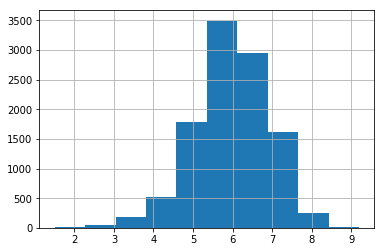

In [18]:
df['vote_average'].hist();

In [19]:
df['vote_average'].describe()

count    10865.000000
mean         5.975012
std          0.935138
min          1.500000
25%          5.400000
50%          6.000000
75%          6.600000
max          9.200000
Name: vote_average, dtype: float64

The average voting score is 6.2. The maximum score is 8.4 while the minimum score is 2.2. 50% of the movies fall between 5.7 and 6.7. The movies are going to be seperated into quandrants to better understand what metrics are correlated to higher vote_average

In [20]:
points = [2.2, 5.7, 6.2, 6.7, 8.4]
labels = ['Low Average','Mid-Low Average','Mid-High Average','High Average']
df['vote_cat'] = pd.cut(df['vote_average'], points, labels=labels)
df.head()

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,vote_cat
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,137999939.3,1.392446e+09,Mid-High Average
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,137999939.3,3.481613e+08,High Average
2,262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,101199955.5,2.716190e+08,Mid-High Average
3,140607,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,183999919.0,1.902723e+09,High Average
4,168259,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,174799923.1,1.385749e+09,High Average


Vote average will be divided into 4 categories based on quandrants from above. 'Low Average' consisting of the bottom 25%. 'Mid-Low Average' consisting of 25% to 50%. 'Mid-High Average' consisting of 50% to 75%. 'High-Average' consisting of the top 25%.

In [21]:
df.groupby('vote_cat').mean()

,id,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
vote_cat,,,,,,,,
Low Average,75507.846342,0.451291,96.739662,86.120382,5.037632,2003.336433,1.375665e+07,2.258782e+07
Mid-Low Average,57590.996686,0.611377,102.935791,175.104805,5.999130,2000.527341,1.992864e+07,5.058866e+07
Mid-High Average,51814.345100,0.716866,105.685555,250.318161,6.490571,1999.624245,2.026817e+07,6.353433e+07
High Average,71499.854338,0.984870,107.168493,478.550685,7.192557,2000.064384,1.947451e+07,9.446883e+07


A couple trends based on the mean of the four categories. Higher average rating tend to be longer, have more overall votes, are older and have much larger revenue. Budget does not appear to have a correlation to the average voting score. While overall profit appears to be much higher for Mid-tier movies.

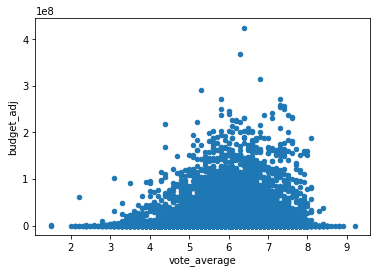

In [22]:
df.plot.scatter(x='vote_average',y='budget_adj');

Average votes does not appear to be correlated to the amount of money spent on the movie.

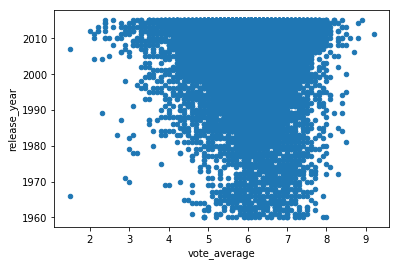

In [23]:
df.plot.scatter(x='vote_average',y='release_year');

Older movies appear to maintain a higher average.

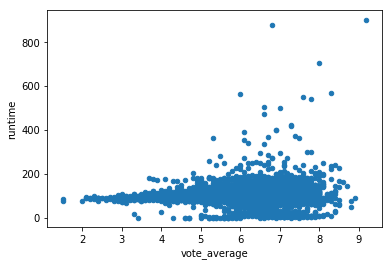

In [24]:
df.plot.scatter(x='vote_average',y='runtime');

Runtime also shows a slight positive correlation.

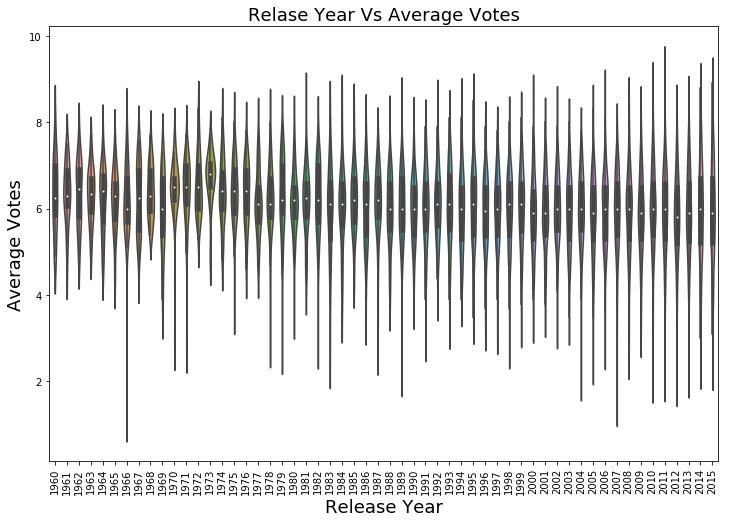

In [25]:
#set a figure size
fig, ax = plt.subplots() 
fig.set_size_inches(12, 8)
sns.violinplot(x = 'release_year' , y = 'vote_average', data=df);

#gives names to x-axis , y-axis & the title
plt.xlabel('Release Year',fontsize = 18);
plt.ylabel('Average Votes',fontsize = 18);
plt.title('Relase Year Vs Average Votes', fontsize = 18)
plt.xticks(rotation = 90);

Movies created early on had much "tighet" ratings. Average rating per year trends downward. As well as, the worst movie of the year keeps getting worse on average.

In [26]:
df.sort_values(by='vote_average',ascending=0).head(3)

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,vote_cat
3894,125336,0.006925,The Story of Film: An Odyssey,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...,Mark Cousins,900,Documentary,NaN,2011-09-03,14,9.2,2011,0.0,0.0,NaN
538,224972,0.114264,The Mask You Live In,NaN,Jennifer Siebel Newsom,88,Documentary,NaN,2015-01-01,11,8.9,2015,0.0,0.0,NaN
1200,374430,0.129531,Black Mirror: White Christmas,Jon Hamm|Rafe Spall|Oona Chaplin|Natalia Tena|...,Carl Tibbetts,74,Drama|Horror|Mystery|Science Fiction|Thriller,NaN,2014-12-16,41,8.8,2014,0.0,0.0,NaN


Top 3 movies based on Voter Average.

In [27]:
df.sort_values(by='vote_average').head(3)

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,vote_cat
10865,22293,0.035919,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,Harold P. Warren,74,Horror,Norm-Iris,1966-11-15,15,1.5,1966,127642.2792,0.0,NaN
7772,25055,0.121120,Transmorphers,Matthew Wolf|Amy Weber|Shaley Scott|Eliza Swen...,Leigh Scott,86,Action|Adventure|Science Fiction,"Asylum, The",2007-06-26,10,1.5,2007,0.0000,0.0,NaN
4882,120846,0.079281,Jurassic Shark,Emanuelle Carriere|Christine Emes|Celine Filio...,Brett Kelly,75,Action|Horror|Science Fiction,Dudez Productions,2012-09-21,13,2.0,2012,0.0000,0.0,NaN


Worst 3 movies based on Voter Average.

### What drives profitability?

In [30]:
df_zero.profit.describe()

count    3.855000e+03
mean     9.279309e+07
std      1.940562e+08
min     -4.139124e+08
25%     -1.507157e+06
50%      2.736550e+07
75%      1.074152e+08
max      2.750137e+09
Name: profit, dtype: float64

The max profit is 2.75 billion while the min profit was a loss of 414 million. The average profit is 27.4 million.

In [32]:
lost = df_zero.query('profit < 0')
made = df_zero.query('profit > 0')

In [33]:
lost_money = lost['budget_adj'].mean()
made_money = made['budget_adj'].mean()

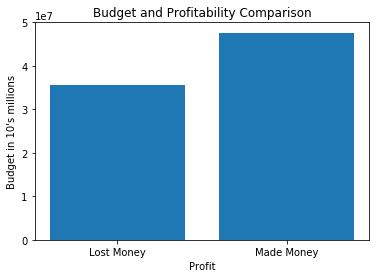

In [34]:
locations = [1,2]
heights = [lost_money,made_money]
labels = ['Lost Money','Made Money']
plt.bar(locations, heights, tick_label=labels)
plt.title('Budget and Profitability Comparison')
plt.xlabel('Profit')
plt.ylabel("Budget in 10's millions");

It appears movies that had a larger budget made a profit. The old saying, "It takes money to make money".

In [35]:
rating_lost = lost['vote_average'].mean()
rating_made = made['vote_average'].mean()

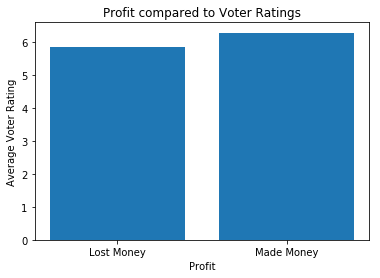

In [36]:
locations = [1,2]
heights = [rating_lost,rating_made]
labels = ['Lost Money','Made Money']
plt.bar(locations, heights, tick_label=labels)
plt.title('Profit compared to Voter Ratings')
plt.xlabel('Profit')
plt.ylabel("Average Voter Rating");

Movies that made more profit had a higher overall rating by viewers.

In [37]:
numrating_lost = lost['vote_count'].mean()
numrating_made = made['vote_count'].mean()

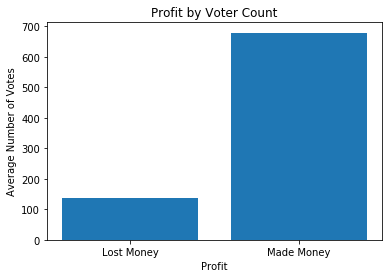

In [38]:
locations = [1,2]
heights = [numrating_lost,numrating_made]
labels = ['Lost Money','Made Money']
plt.bar(locations, heights, tick_label=labels)
plt.title('Profit by Voter Count')
plt.xlabel('Profit')
plt.ylabel("Average Number of Votes");

Voters tend to review movies that make a profit substantially more than movies that do not make a profit.

In [73]:
years = df_zero['release_year'].unique()

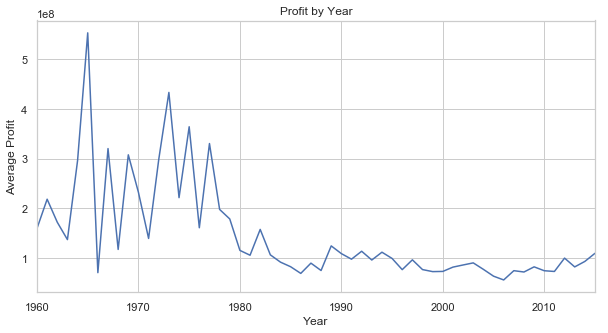

In [72]:
df_zero.groupby('release_year')['profit'].mean().plot()

plt.title('Profit by Year')
plt.xlabel('Year')
plt.ylabel('Average Profit');

Appears that new movies on average are marking larger profits.

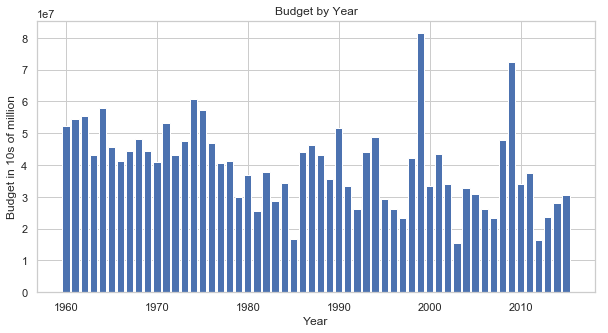

In [71]:
by_year_budget = df_zero.groupby('release_year')['budget_adj'].mean()
plt.bar(years,by_year_budget)
plt.title('Budget by Year')
plt.xlabel('Year')
plt.ylabel("Budget in 10s of million");

Budgets are trending downward year over year.

In [44]:
month_release = df['release_date'].dt.month

In [46]:
number_released = month_release.value_counts().sort_index()
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
number_released = pd.DataFrame(number_released)
number_released['month'] = months

Text(0, 0.5, 'Number of movie releases')

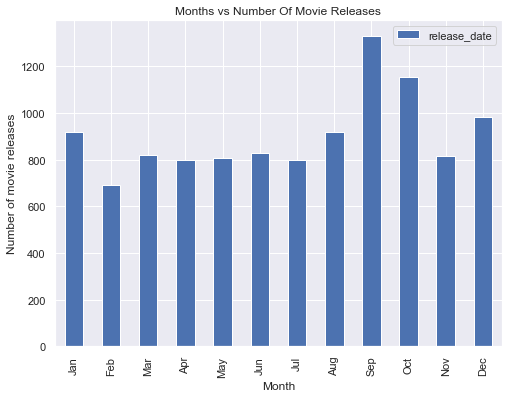

In [49]:
number_released.plot(x='month',kind='bar',figsize=(8,6))
plt.title('Months vs Number Of Movie Releases')
plt.xlabel('Month')
plt.ylabel('Number of movie releases')

Text(0, 0.5, 'Average Revenue')

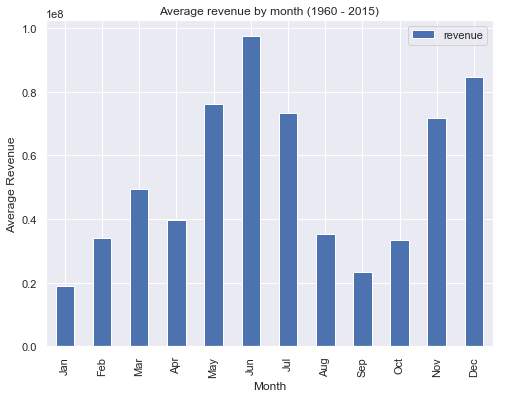

In [56]:
month_release = pd.DataFrame(month_release)
month_release.rename(columns = {'release_date':'release_month'},inplace=True)
month_release['revenue'] = df['revenue_adj']
mean_revenue  = month_release.groupby('release_month').mean()
mean_revenue['month'] = months
mean_revenue.plot(x='month',kind='bar',figsize = (8,6))
plt.title('Average revenue by month (1960 - 2015)')
plt.xlabel('Month')
plt.ylabel('Average Revenue')

Movies release in June or December have made the highest revenue compared to other months.

### Which year was the most movies released?

In [42]:
data=df.groupby('release_year').count()['id']
print(data.tail())

release_year
2011    540
2012    588
2013    659
2014    700
2015    629
Name: id, dtype: int64


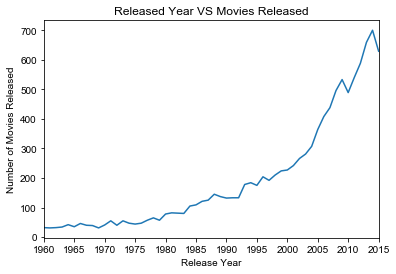

In [43]:
df.groupby('release_year').count()['id'].plot(xticks = np.arange(1960,2016,5))
sns.set(rc={'figure.figsize':(10,5)})
plt.title('Released Year VS Movies Released', fontsize = 12)
plt.xlabel('Release Year')
plt.ylabel('Number of Movies Released');

The number of movies released per year has steaditly grow through around 2010. The year with the highest release of movies is 2014.

### Which genre are the most produced?

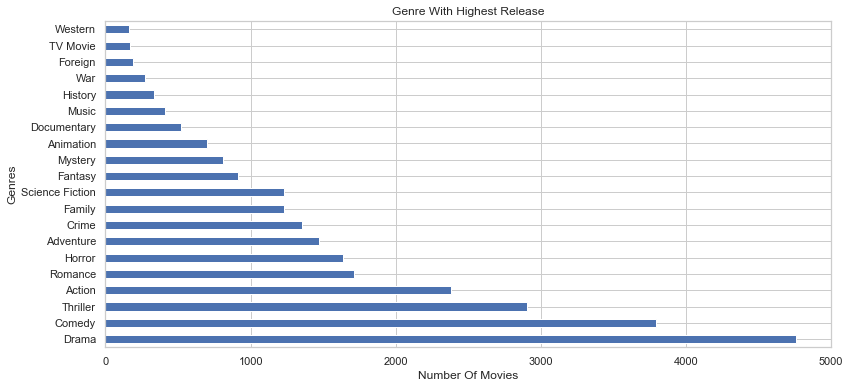

In [63]:
def count_genre(x):
    data_plot = df[x].str.cat(sep = '|')
    data = pd.Series(data_plot.split('|'))
    info = data.value_counts(ascending=False)
    return info

total_genre_movies = count_genre('genres')
total_genre_movies.plot(kind= 'barh',figsize = (13,6))

plt.title("Genre With Highest Release")
plt.xlabel('Number Of Movies')
plt.ylabel("Genres")
sns.set_style("whitegrid")

Drama, Comedy, and Thriller are the 3 most common genres.



<a id='conclusions'></a>
## Conclusions


Findings:<br>
    1) Movies with larger budgets are more likely to make a profit, make a larger profit, receive more ratings and receive higher ratings. <br>
    2) Newer movies are able to make larger profits while the budget to produce a movie is decreasing <br>
    3) Longer movies and older movies receive better ratings<br>
    4) Movies released in June and December are the 2 months with the most revenue on average<br>
    5) Number of movies being produced is growing throughout time<br>
    6) Drama, Comedy, and Thriller are the 3 most common genres

Limitations of exploration:<br>
    - 6,000+ movies without data on revenue or budget
    - NULL results for Director's was removed